<a href="https://colab.research.google.com/github/saileshraturi/RNN-over-Images/blob/master/RNN_over_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN,LSTM,GRU,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [0]:
#fashion_mnist = tf.keras.datasets.fashion_mnist
mnist = tf.keras.datasets.mnist

In [40]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
(x_train,x_test) = x_train/255.0, x_test/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [41]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [42]:
print(x_train[0].shape)

(28, 28)


In [0]:
#build the model

i = Input(shape=(x_train[0].shape))
o = LSTM(128)(i)
o = Dense(10,activation='softmax')(o)
model = Model(i,o)

In [0]:
#Compile the Model
model.compile(optimizer='Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy',)

In [48]:
#Train the model
r = model.fit(x_train,y_train,
              epochs = 20,
              validation_data = (x_test,y_test),)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0370 - val_accuracy: 0.9885
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0153 - accuracy: 0.9955 - val_loss: 0.0484 - val_accuracy: 0.9875
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0407 - val_accuracy: 0.9881
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.0450 - val_accuracy: 0.9872
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0449 - val_accuracy: 0.9877
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.0469 - val_accuracy: 0.9876
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.0444 - val_accuracy:

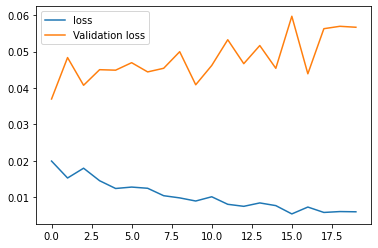

In [51]:
plt.plot(r.history['loss'],label ='loss')
plt.plot(r.history['val_loss'],label = 'Validation loss')
plt.legend()

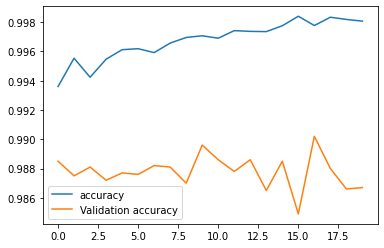

In [50]:
plt.plot(r.history['accuracy'],label ='accuracy')
plt.plot(r.history['val_accuracy'],label = 'Validation accuracy')
plt.legend()

In [0]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

confusion matrix without normalization
[[ 975    0    0    0    1    2    1    1    0    0]
 [   1 1127    1    1    1    1    0    2    1    0]
 [   0    0 1027    0    1    0    0    4    0    0]
 [   0    0    4  997    0    5    0    3    1    0]
 [   0    1    3    0  975    0    0    0    0    3]
 [   1    0    0    1    1  888    1    0    0    0]
 [   3    3    9    1    1    6  930    0    5    0]
 [   0    3    6    3    3    0    0 1012    1    0]
 [   0    3    2    1    0    4    2    4  956    2]
 [   0    0    0    0   11    2    0    9    7  980]]


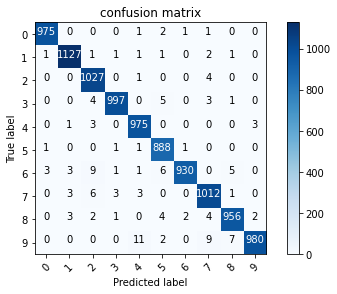

In [53]:
def plot_confusion_matrix(cm,classes,
                          normalize = False,
                          title = 'confusion matrix',
                          cmap =plt.cm.Blues):
  #This function print and plot the confusion matrix
  if normalize:
      cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('confusion matrix without normalization')
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation = 45)
  plt.yticks(tick_marks,classes)

  fmt ='.2f' if normalize else 'd'
  thresh = cm.max() / 2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j],fmt),
               horizontalalignment='center',
               color = 'white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

p_test = model.predict(x_test).argmax(axis =1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [0]:

#Label Mapping
labels = ''' T-shirt/Top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaket
Belt
AnkleBoot '''.split()

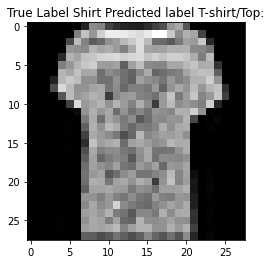

In [38]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i= np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True Label %s Predicted label %s:"% (labels[y_test[i]],labels[p_test[i]]));